# Import des librairies

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from functions import randomforestclass
from functions import download
from functions import isolation_forest

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

sns.set_theme()
%matplotlib inline

# Téléchargement du dataset 

In [3]:
downloader_object = download.Downloader('./data')

downloader_object.data_download('valeursfoncieres-2019.txt', 'https://www.data.gouv.fr/fr/datasets/r/3004168d-bec4-44d9-a781-ef16f41856a2')

Data downloading...
Download finished


# Netttoyage du dataset

In [2]:
df_base = pd.read_csv("./data/RAW/valeursfoncieres-2019.txt", sep = '|', decimal = ',', 
            usecols = ['Nature mutation', 'Valeur fonciere', 'Code postal',
            'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 
            'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 
            'Surface Carrez du 5eme lot', 'Nombre de lots', 'Type local', 
            'Nombre pieces principales', "Surface terrain", "Surface reelle bati"])

In [3]:
df_base = df_base[["Valeur fonciere", "Code postal","Nombre de lots", "Nombre pieces principales", "Surface terrain", "Type local", "Surface reelle bati"]][df_base["Nature mutation"].str.contains("Vente", regex=True)]

In [4]:
df_base = df_base.dropna(subset=["Type local"])

In [5]:
df_base = df_base[["Valeur fonciere", "Code postal","Nombre de lots", "Nombre pieces principales", "Surface terrain", "Surface reelle bati", "Type local"]][df_base["Type local"].str.contains("Appartement|Maison", regex=True)]

In [6]:
df_base.describe()

,Valeur fonciere,Code postal,Nombre de lots,Nombre pieces principales,Surface terrain,Surface reelle bati
count,9.383990e+05,941966.000000,942020.000000,941999.000000,600981.000000,941999.000000
mean,1.344418e+06,54013.154398,0.548364,3.471810,1420.887833,81.633689
std,9.758846e+06,27508.446684,0.863714,1.608006,6781.688450,46.428258
min,1.500000e-01,1000.000000,0.000000,0.000000,0.000000,1.000000
25%,1.100000e+05,33000.000000,0.000000,2.000000,265.000000,50.000000
50%,1.800000e+05,56110.000000,0.000000,3.000000,500.000000,75.000000
75%,3.010000e+05,77500.000000,1.000000,4.000000,919.000000,102.000000
max,2.086000e+09,97490.000000,49.000000,67.000000,556633.000000,2426.000000


In [7]:
df_preclean = df_base.dropna(subset=['Valeur fonciere'])
df_preclean = df_preclean.dropna(subset=['Code postal'])
df_preclean = df_preclean.dropna(subset=['Surface reelle bati'])
df_preclean = df_preclean[df_preclean["Nombre de lots"] < 6]
df_preclean = df_preclean[df_preclean["Nombre pieces principales"] != 0]
df_preclean = df_preclean[df_preclean["Surface reelle bati"] > 8]
df_toIF = df_preclean.fillna(0)

df_toIF.describe()

,Valeur fonciere,Code postal,Nombre de lots,Nombre pieces principales,Surface terrain,Surface reelle bati
count,9.348980e+05,934898.000000,934898.000000,934898.000000,934898.000000,934898.000000
mean,1.347933e+06,54053.059971,0.541870,3.480598,871.480295,81.815825
std,9.776103e+06,27504.830988,0.829173,1.602406,4373.318881,46.366393
min,1.500000e-01,1000.000000,0.000000,1.000000,0.000000,9.000000
25%,1.100000e+05,33000.000000,0.000000,2.000000,0.000000,50.000000
50%,1.800000e+05,56140.000000,0.000000,3.000000,230.000000,75.000000
75%,3.010000e+05,77520.000000,1.000000,4.000000,633.000000,102.000000
max,2.086000e+09,97490.000000,5.000000,67.000000,556633.000000,2426.000000


C:\Users\drakk\Anaconda3\envs\fourre-tout\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\drakk\Anaconda3\envs\fourre-tout\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\drakk\Anaconda3\envs\fourre-tout\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

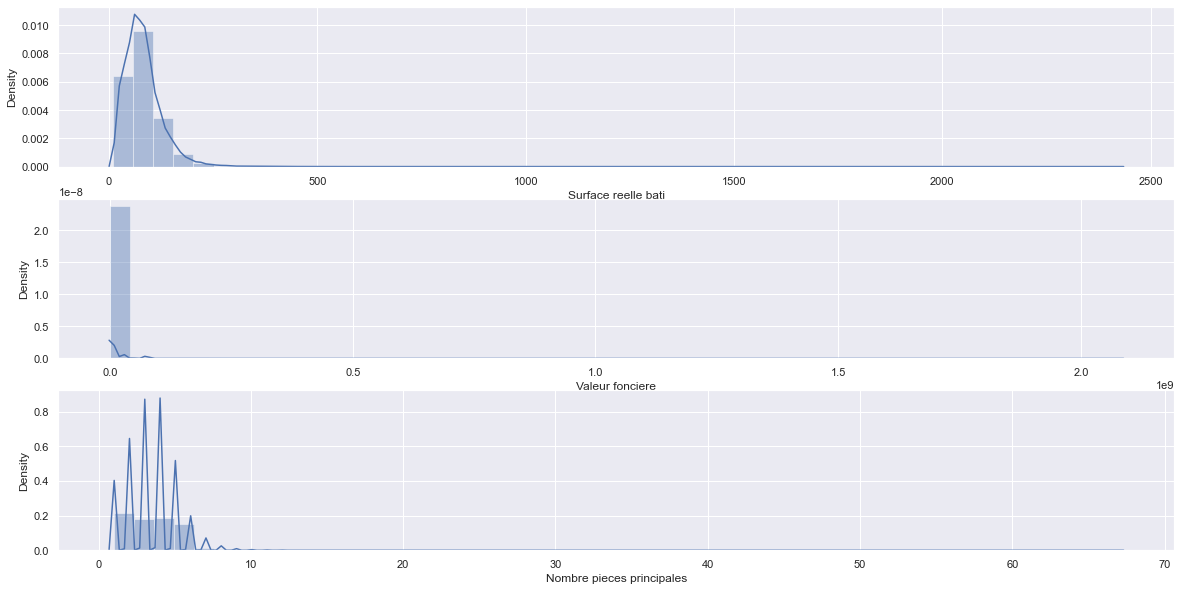

In [8]:
plt.figure(figsize=(20,10))

plt.subplot(3, 1, 1)
sns.distplot(df_toIF["Surface reelle bati"])

plt.subplot(3, 1, 2)
sns.distplot(df_toIF["Valeur fonciere"])

plt.subplot(3, 1, 3)
sns.distplot(df_toIF["Nombre pieces principales"])

plt.show()

In [9]:
df_toIF.to_csv("./data/CURATED/csv_clean_1.csv")

del df_base
del df_preclean
del df_toIF

# Isolation forest

In [10]:
isolation_forest.isolation_forest('./data/CURATED/csv_clean_1.csv', './data/CURATED/anomaly_csv_clean_1.csv')

df_anomaly = pd.read_csv('./data/CURATED/anomaly_csv_clean_1.csv', sep = ',', decimal = ',')
df_csv_clean = pd.read_csv('./data/CURATED/csv_clean_1.csv', sep = ',', decimal = ',')
df_anomaly = df_anomaly.drop(columns = ['Unnamed: 0'])
df_anomaly = df_anomaly.drop(columns = ['Valeur fonciere', 'Code postal', 'Nombre de lots', 'Nombre pieces principales', 'Surface terrain', 'Surface reelle bati', 'scores'])
df_anomaly = df_anomaly.rename(columns = {'Unnamed: 0.1':'Unnamed: 0'})
df_add_anomaly = df_csv_clean.merge(df_anomaly, how = 'left', on = 'Unnamed: 0')
df_add_anomaly = df_add_anomaly.fillna(0)
df_add_anomaly = df_add_anomaly[df_add_anomaly["anomaly"] == 0]
df_add_anomaly = df_add_anomaly.drop(columns = ['Unnamed: 0', 'anomaly'])
df_add_anomaly.to_csv('./data/CURATED/csv_clean_2.csv')

del df_anomaly
del df_csv_clean
del df_add_anomaly

   Unnamed: 0  Valeur fonciere  Code postal  Nombre de lots  \
0           0          37220.0       1000.0               1   
1           1         185100.0       1000.0               2   
2           3         209000.0       1160.0               0   
3           4         134900.0       1370.0               0   
4           5         192000.0       1340.0               0   
5           6          45000.0       1250.0               0   
6           9          65000.0       1000.0               2   
7          10          37000.0       1000.0               2   
8          13         116000.0       1560.0               0   
9          16         266000.0       1340.0               0   

   Nombre pieces principales  Surface terrain  Surface reelle bati  \
0                        1.0              0.0                 20.0   
1                        3.0              0.0                 62.0   
2                        4.0            940.0                 90.0   
3                        5

# Préparation pour passage en random forest

In [18]:
cleaned_dataframe = pd.read_csv('./data/CURATED/csv_clean_2.csv', usecols = ['Code postal', 'Valeur fonciere', 'Nombre pieces principales', 'Surface terrain', 'Surface reelle bati', 'Type local_x'])
cleaned_dataframe = cleaned_dataframe[cleaned_dataframe['Valeur fonciere'].between(cleaned_dataframe['Valeur fonciere'].quantile(.10), cleaned_dataframe['Valeur fonciere'].quantile(.90))]
cleaned_dataframe_maison = cleaned_dataframe[cleaned_dataframe['Type local_x'].isin(['Maison'])]
cleaned_dataframe_appart = cleaned_dataframe[cleaned_dataframe['Type local_x'].isin(['Appartement'])]
cleaned_dataframe_maison.to_csv('./data/CURATED/csv_clean_maison.csv')
cleaned_dataframe_appart.to_csv('./data/CURATED/csv_clean_appart.csv')


df_clean2_maison = pd.read_csv('./data/CURATED/csv_clean_maison.csv', usecols=['Valeur fonciere', 'Code postal', 'Surface reelle bati'])
df_clean2_maison["Prix moyen m²"] = df_clean2_maison['Valeur fonciere']/df_clean2_maison['Surface reelle bati']
df_prix_moyen_maison = df_clean2_maison.groupby('Code postal').mean('Prix moyen m²').drop(columns=['Valeur fonciere', 'Surface reelle bati'])
cleaned_dataframe_maison = cleaned_dataframe_maison.merge(df_prix_moyen_maison, how='left', on='Code postal')
cleaned_dataframe_maison = cleaned_dataframe_maison.drop(columns=['Code postal', 'Type local_x'])


df_clean2_appart = pd.read_csv('./data/CURATED/csv_clean_appart.csv', usecols=['Valeur fonciere', 'Code postal', 'Surface reelle bati'])
df_clean2_appart["Prix moyen m²"] = df_clean2_appart['Valeur fonciere']/df_clean2_appart['Surface reelle bati']
df_prix_moyen_appart = df_clean2_appart.groupby('Code postal').mean('Prix moyen m²').drop(columns=['Valeur fonciere', 'Surface reelle bati'])
cleaned_dataframe_appart = cleaned_dataframe_appart.merge(df_prix_moyen_appart, how='left', on='Code postal')
cleaned_dataframe_appart = cleaned_dataframe_appart.drop(columns=['Code postal', 'Type local_x'])

del df_clean2_maison
del df_prix_moyen_maison
del df_clean2_appart
del df_prix_moyen_appart

C:\Users\drakk\Anaconda3\envs\fourre-tout\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\drakk\Anaconda3\envs\fourre-tout\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\drakk\Anaconda3\envs\fourre-tout\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

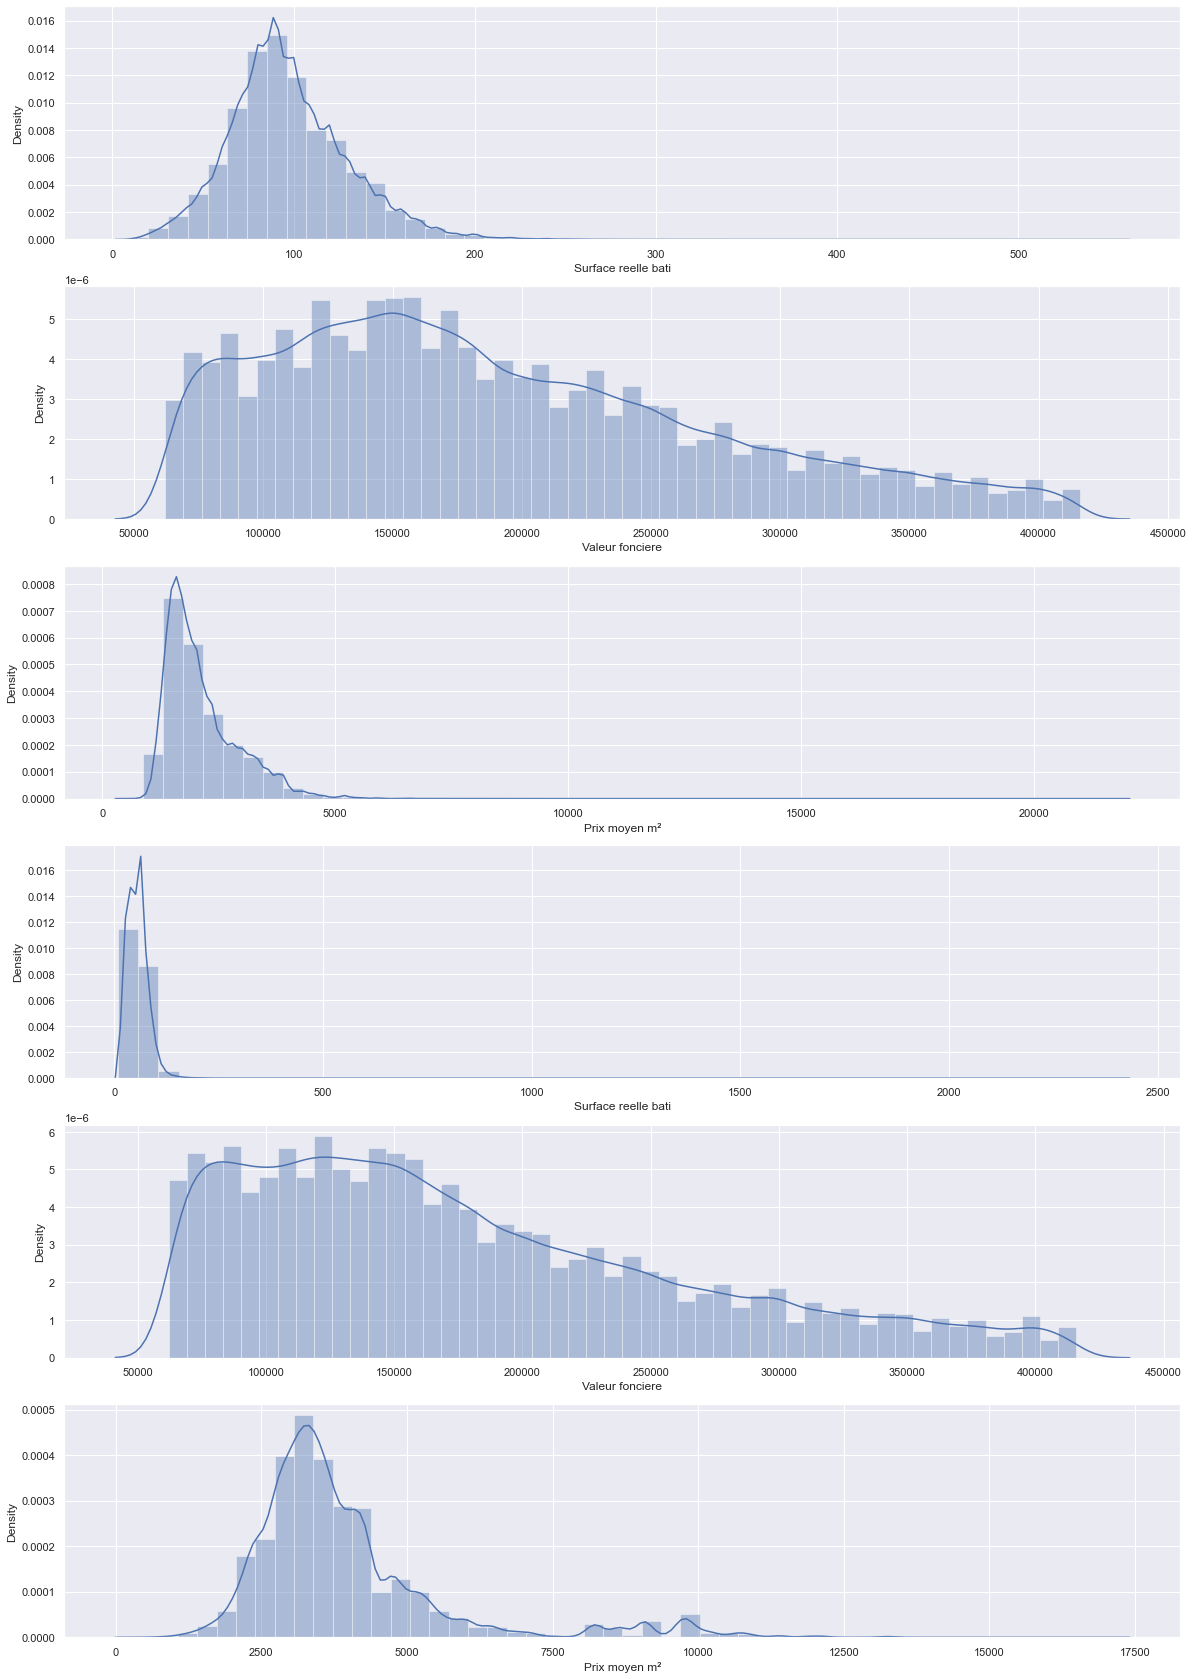

In [19]:
plt.figure(figsize=(20,30))

plt.subplot(6, 1, 1)
sns.distplot(cleaned_dataframe_maison["Surface reelle bati"])

plt.subplot(6, 1, 2)
sns.distplot(cleaned_dataframe_maison["Valeur fonciere"])

plt.subplot(6, 1, 3)
sns.distplot(cleaned_dataframe_maison["Prix moyen m²"])

plt.subplot(6, 1, 4)
sns.distplot(cleaned_dataframe_appart["Surface reelle bati"])

plt.subplot(6, 1, 5)
sns.distplot(cleaned_dataframe_appart["Valeur fonciere"])

plt.subplot(6, 1, 6)
sns.distplot(cleaned_dataframe_appart["Prix moyen m²"])

plt.show()

<AxesSubplot:>

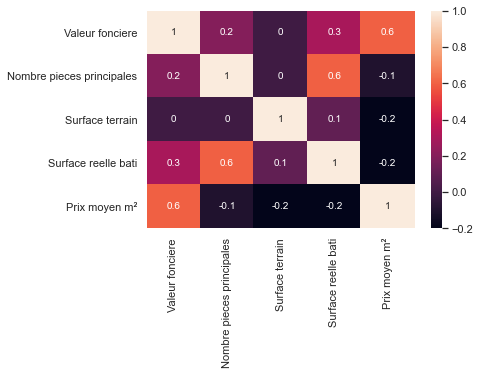

In [13]:
#matrice corr maison
matrice_corr = cleaned_dataframe_maison.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

<AxesSubplot:>

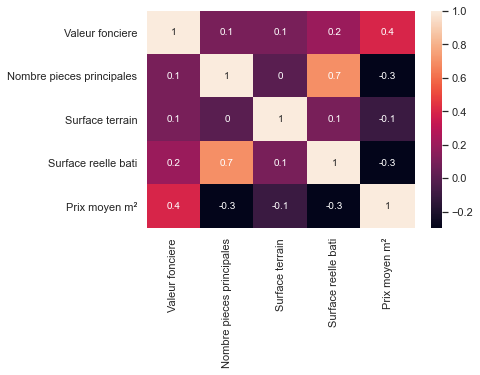

In [14]:
#matrice corr appart
matrice_corr = cleaned_dataframe_appart.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

In [15]:
X_maison = pd.DataFrame(np.c_[cleaned_dataframe_maison['Nombre pieces principales'],cleaned_dataframe_maison['Surface terrain'],cleaned_dataframe_maison['Surface reelle bati'], cleaned_dataframe_maison['Prix moyen m²']], columns = ['Nombre pieces principales','Surface terrain','Surface reelle bati', 'Prix moyen m²'])

Y_maison = cleaned_dataframe_maison['Valeur fonciere']

X_train_maison, X_test_maison, y_train_maison, y_test_maison = train_test_split(X_maison, Y_maison, test_size = 0.2, random_state=5)

del cleaned_dataframe_maison
del X_maison
del Y_maison


X_appart = pd.DataFrame(np.c_[cleaned_dataframe_appart['Nombre pieces principales'],cleaned_dataframe_appart['Surface terrain'],cleaned_dataframe_appart['Surface reelle bati'], cleaned_dataframe_appart['Prix moyen m²']], columns = ['Nombre pieces principales','Surface terrain','Surface reelle bati', 'Prix moyen m²'])

Y_appart = cleaned_dataframe_appart['Valeur fonciere']

X_train_appart, X_test_appart, y_train_appart, y_test_appart = train_test_split(X_appart, Y_appart, test_size = 0.2, random_state=5)

del cleaned_dataframe_appart
del X_appart
del Y_appart

In [6]:
sc = StandardScaler()
X_train_maison_flat = sc.fit_transform(X_train_maison)
X_test_maison = sc.transform(X_test_maison)

X_train_appart_flat = sc.fit_transform(X_train_appart)
X_test_appart = sc.transform(X_test_appart)

# Sauvegarde du modele

In [7]:
filepath_maison = "./model/model_maison.json"
filepath_data_maison = './model/data_maison.csv'

randomforest_maison = randomforestclass.RandomForest(X_train=X_train_maison_flat, Y_train=y_train_maison, data=X_train_maison) 
 
randomforest_maison.save_json(filepath_maison, filepath_data_maison)

In [8]:
filepath_appart = "./model/model_appart.json"
filepath_data_appart = './model/data_appart.csv'

randomforest_appart = randomforestclass.RandomForest(X_train=X_train_appart_flat, Y_train=y_train_appart, data=X_train_appart) 
 
randomforest_appart.save_json(filepath_appart, filepath_data_appart)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train_appart_flat, y_train_appart)